Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading Dataset

In [4]:
d = pd.read_csv(r'C:\Users\haris\Downloads\WeatherJena.csv')
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),CO2 (ppm)
0,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,...,1.61,2.76,15.41,0.0,0,0.0,0.0,0.0,8.59,404.6
1,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.00,3.10,17.04,0.0,0,0.0,0.0,0.0,8.53,404.1
2,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,...,2.25,3.79,25.35,0.0,0,0.0,0.0,0.0,8.52,404.3
3,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,...,2.64,3.77,23.64,0.0,270,0.0,0.0,0.0,8.54,404.0
4,01.01.2010 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,...,2.82,4.29,18.94,0.0,310,0.0,0.0,0.0,8.55,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656951,30.06.2022 23:20:00,984.33,22.00,296.49,19.85,87.6,26.48,23.20,3.28,14.79,...,1.04,1.34,40.23,0.0,0,0.0,0.0,0.0,32.45,445.8
656952,30.06.2022 23:30:00,984.20,21.92,296.42,19.91,88.4,26.35,23.30,3.06,14.86,...,1.07,1.49,31.68,0.0,0,0.0,0.0,0.0,32.30,446.2
656953,30.06.2022 23:40:00,984.18,21.77,296.27,19.84,88.8,26.11,23.19,2.92,14.79,...,0.46,0.79,222.00,0.0,0,0.0,0.0,0.0,32.14,446.3
656954,30.06.2022 23:50:00,984.24,21.67,296.16,19.83,89.3,25.95,23.18,2.78,14.78,...,0.97,1.64,233.30,0.0,0,0.0,0.0,0.0,31.99,443.9


Removing null columns

In [5]:
d=d[['Date Time','p (mbar)','T (degC)','Tpot (K)','Tdew (degC)','rh (%)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wv (m/s)', 'max. wv (m/s)','wd (deg)','rain (mm)',
'CO2 (ppm)']]  
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
0,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41,0.0,404.6
1,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04,0.0,404.1
2,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35,0.0,404.3
3,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64,0.0,404.0
4,01.01.2010 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,4.86,1244.81,2.82,4.29,18.94,0.0,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656951,30.06.2022 23:20:00,984.33,22.00,296.49,19.85,87.6,26.48,23.20,3.28,14.79,23.57,1151.44,1.04,1.34,40.23,0.0,445.8
656952,30.06.2022 23:30:00,984.20,21.92,296.42,19.91,88.4,26.35,23.30,3.06,14.86,23.67,1151.55,1.07,1.49,31.68,0.0,446.2
656953,30.06.2022 23:40:00,984.18,21.77,296.27,19.84,88.8,26.11,23.19,2.92,14.79,23.56,1152.16,0.46,0.79,222.00,0.0,446.3
656954,30.06.2022 23:50:00,984.24,21.67,296.16,19.83,89.3,25.95,23.18,2.78,14.78,23.55,1152.63,0.97,1.64,233.30,0.0,443.9


Data Analysis

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656956 entries, 0 to 656955
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        656956 non-null  object 
 1   p (mbar)         656956 non-null  float64
 2   T (degC)         656956 non-null  float64
 3   Tpot (K)         656956 non-null  float64
 4   Tdew (degC)      656956 non-null  float64
 5   rh (%)           656956 non-null  float64
 6   VPmax (mbar)     656956 non-null  float64
 7   VPact (mbar)     656956 non-null  float64
 8   VPdef (mbar)     656956 non-null  float64
 9   sh (g/kg)        656956 non-null  float64
 10  H2OC (mmol/mol)  656956 non-null  float64
 11  rho (g/m**3)     656956 non-null  float64
 12  wv (m/s)         656956 non-null  float64
 13  max. wv (m/s)    656956 non-null  float64
 14  wd (deg)         656956 non-null  float64
 15  rain (mm)        656956 non-null  float64
 16  CO2 (ppm)        656956 non-null  floa

Changing Date column datatype to datetime

In [7]:
d['Date Time']= pd.to_datetime(d['Date Time'])

C:\Users\haris\AppData\Local\Temp\ipykernel_3532\3582922921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Date Time']= pd.to_datetime(d['Date Time'])


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656956 entries, 0 to 656955
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        656956 non-null  datetime64[ns]
 1   p (mbar)         656956 non-null  float64       
 2   T (degC)         656956 non-null  float64       
 3   Tpot (K)         656956 non-null  float64       
 4   Tdew (degC)      656956 non-null  float64       
 5   rh (%)           656956 non-null  float64       
 6   VPmax (mbar)     656956 non-null  float64       
 7   VPact (mbar)     656956 non-null  float64       
 8   VPdef (mbar)     656956 non-null  float64       
 9   sh (g/kg)        656956 non-null  float64       
 10  H2OC (mmol/mol)  656956 non-null  float64       
 11  rho (g/m**3)     656956 non-null  float64       
 12  wv (m/s)         656956 non-null  float64       
 13  max. wv (m/s)    656956 non-null  float64       
 14  wd (deg)         656

In [9]:
# Sorting by the date 
d.sort_values('Date Time', inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_3532\3765387152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values('Date Time', inplace=True)


In [10]:
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
0,2010-01-01 00:10:00,967.56,-2.84,272.89,-3.41,95.80,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41,0.0,404.6
1,2010-01-01 00:20:00,967.45,-2.85,272.88,-3.43,95.70,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04,0.0,404.1
2,2010-01-01 00:30:00,967.45,-2.88,272.85,-3.46,95.80,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35,0.0,404.3
3,2010-01-01 00:40:00,967.34,-2.90,272.84,-3.47,95.80,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64,0.0,404.0
4,2010-01-01 00:50:00,967.29,-2.96,272.78,-3.53,95.80,4.91,4.70,0.21,3.03,4.86,1244.81,2.82,4.29,18.94,0.0,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654358,2022-12-06 23:10:00,991.63,18.46,292.31,8.86,53.51,21.28,11.39,9.89,7.17,11.48,1179.47,0.53,1.49,345.40,0.0,422.3
654359,2022-12-06 23:20:00,991.58,18.50,292.36,8.59,52.41,21.33,11.18,10.15,7.04,11.27,1179.34,1.64,2.09,331.70,0.0,421.0
654360,2022-12-06 23:30:00,991.52,18.63,292.49,8.37,51.22,21.51,11.02,10.49,6.94,11.11,1178.82,2.26,2.74,335.10,0.0,420.4
654361,2022-12-06 23:40:00,991.55,18.58,292.44,8.32,51.18,21.44,10.97,10.47,6.91,11.07,1179.08,1.57,2.45,325.00,0.0,421.1


In [11]:
d.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
count,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000,656956.000000
mean,989.629414,9.865185,283.873995,5.138933,75.124650,13.909444,9.622059,4.287313,6.076697,9.726866,1214.724769,1.839576,3.247453,175.305706,0.009195,387.611696
std,8.593790,8.283449,8.387817,6.570250,17.216312,7.900362,4.179659,5.175657,2.654493,4.232323,39.558745,53.806316,55.240310,85.730048,0.107539,553.680753
min,913.600000,-21.040000,251.480000,-23.390000,12.950000,1.130000,0.920000,0.000000,0.570000,0.910000,1059.450000,-9999.000000,-9999.000000,0.000000,0.000000,-9999.000000
25%,984.530000,3.690000,277.670000,0.410000,63.630000,7.960000,6.290000,0.930000,3.970000,6.360000,1186.020000,0.990000,1.760000,125.800000,0.000000,402.700000
50%,989.970000,9.570000,283.630000,5.270000,78.300000,11.940000,8.900000,2.310000,5.610000,8.990000,1213.280000,1.740000,2.960000,198.100000,0.000000,414.600000
75%,995.230000,15.830000,289.870000,10.190000,89.100000,18.010000,12.450000,5.630000,7.870000,12.590000,1242.370000,2.840000,4.760000,233.600000,0.000000,428.000000
max,1020.070000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,47.810000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000,18.900000,586.000000


C:\Users\haris\AppData\Local\Temp\ipykernel_3532\1666148302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[['T (degC)']])


<AxesSubplot: ylabel='Density'>

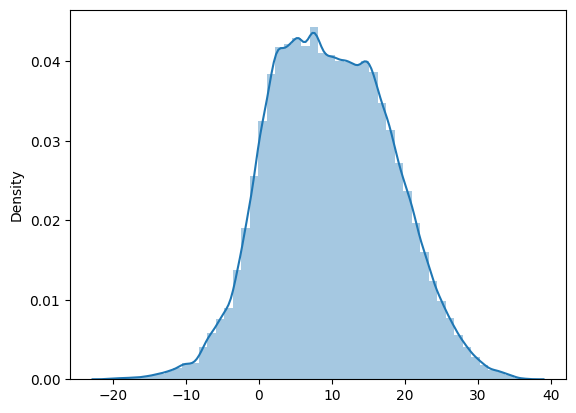

In [12]:
sns.distplot(d[['T (degC)']])

Feature Selection using correlation

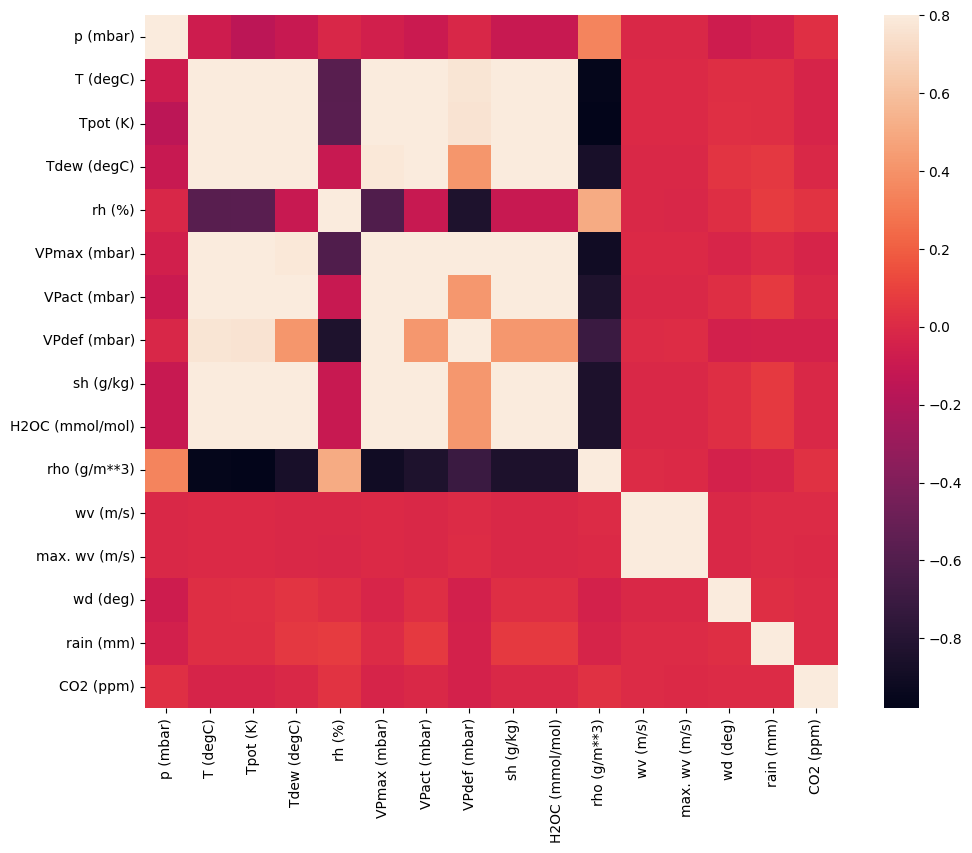

In [13]:
#correlation matrix

corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
new_d=d[['Date Time','T (degC)','Tpot (K)','Tdew (degC)', 'VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','rh (%)']]

Extracted features

In [15]:
new_d

,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
0,2010-01-01 00:10:00,-2.84,272.89,-3.41,4.95,4.75,0.21,3.06,4.91,1244.56,95.80
1,2010-01-01 00:20:00,-2.85,272.88,-3.43,4.95,4.74,0.21,3.05,4.90,1244.48,95.70
2,2010-01-01 00:30:00,-2.88,272.85,-3.46,4.94,4.73,0.21,3.05,4.89,1244.65,95.80
3,2010-01-01 00:40:00,-2.90,272.84,-3.47,4.93,4.72,0.21,3.04,4.88,1244.57,95.80
4,2010-01-01 00:50:00,-2.96,272.78,-3.53,4.91,4.70,0.21,3.03,4.86,1244.81,95.80
...,...,...,...,...,...,...,...,...,...,...,...
654358,2022-12-06 23:10:00,18.46,292.31,8.86,21.28,11.39,9.89,7.17,11.48,1179.47,53.51
654359,2022-12-06 23:20:00,18.50,292.36,8.59,21.33,11.18,10.15,7.04,11.27,1179.34,52.41
654360,2022-12-06 23:30:00,18.63,292.49,8.37,21.51,11.02,10.49,6.94,11.11,1178.82,51.22
654361,2022-12-06 23:40:00,18.58,292.44,8.32,21.44,10.97,10.47,6.91,11.07,1179.08,51.18


Data Cleaning - Removal of outliers using Z-score

In [16]:
#Using z_scores to remove outliers


cols = ['T (degC)','Tpot (K)','Tdew (degC)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','rh (%)']


def z_score(new_d):
    new_d.columns = [x + "_zscore" for x in new_d.columns.tolist()]
    return ((new_d - new_d.mean())/new_d.std(ddof=0))

In [17]:
z_scores = z_score(new_d[cols])
z_scores['ID'] = z_scores.index
z_scores

,T (degC)_zscore,Tpot (K)_zscore,Tdew (degC)_zscore,VPmax (mbar)_zscore,VPact (mbar)_zscore,VPdef (mbar)_zscore,sh (g/kg)_zscore,H2OC (mmol/mol)_zscore,rho (g/m**3)_zscore,rh (%)_zscore,ID
0,-1.533805,-1.309519,-1.301159,-1.134056,-1.165660,-0.787787,-1.136450,-1.138115,0.754201,1.200917,0
1,-1.535012,-1.310711,-1.304203,-1.134056,-1.168053,-0.787787,-1.140217,-1.140478,0.752179,1.195109,1
2,-1.538634,-1.314288,-1.308769,-1.135321,-1.170445,-0.787787,-1.140217,-1.142841,0.756476,1.200917,2
3,-1.541048,-1.315480,-1.310291,-1.136587,-1.172838,-0.787787,-1.143985,-1.145203,0.754454,1.200917,3
4,-1.548292,-1.322633,-1.319423,-1.139119,-1.177623,-0.787787,-1.147752,-1.149929,0.760521,1.200917,4
...,...,...,...,...,...,...,...,...,...,...,...
654358,1.037590,1.005746,0.566351,0.932940,0.422987,1.082508,0.411869,0.414225,-0.891201,-1.255476,654358
654359,1.042419,1.011707,0.525257,0.939268,0.372744,1.132744,0.362896,0.364607,-0.894487,-1.319369,654359
654360,1.058113,1.027206,0.491773,0.962052,0.334463,1.198436,0.325224,0.326803,-0.907632,-1.388490,654360
654361,1.052076,1.021244,0.484163,0.953192,0.322500,1.194571,0.313922,0.317352,-0.901060,-1.390813,654361


In [18]:
new_d['ID'] = new_d.index
new_d = pd.merge(new_d, z_scores)
new_d

C:\Users\haris\AppData\Local\Temp\ipykernel_3532\2775430772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d['ID'] = new_d.index


,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),...,T (degC)_zscore,Tpot (K)_zscore,Tdew (degC)_zscore,VPmax (mbar)_zscore,VPact (mbar)_zscore,VPdef (mbar)_zscore,sh (g/kg)_zscore,H2OC (mmol/mol)_zscore,rho (g/m**3)_zscore,rh (%)_zscore
0,2010-01-01 00:10:00,-2.84,272.89,-3.41,4.95,4.75,0.21,3.06,4.91,1244.56,...,-1.533805,-1.309519,-1.301159,-1.134056,-1.165660,-0.787787,-1.136450,-1.138115,0.754201,1.200917
1,2010-01-01 00:20:00,-2.85,272.88,-3.43,4.95,4.74,0.21,3.05,4.90,1244.48,...,-1.535012,-1.310711,-1.304203,-1.134056,-1.168053,-0.787787,-1.140217,-1.140478,0.752179,1.195109
2,2010-01-01 00:30:00,-2.88,272.85,-3.46,4.94,4.73,0.21,3.05,4.89,1244.65,...,-1.538634,-1.314288,-1.308769,-1.135321,-1.170445,-0.787787,-1.140217,-1.142841,0.756476,1.200917
3,2010-01-01 00:40:00,-2.90,272.84,-3.47,4.93,4.72,0.21,3.04,4.88,1244.57,...,-1.541048,-1.315480,-1.310291,-1.136587,-1.172838,-0.787787,-1.143985,-1.145203,0.754454,1.200917
4,2010-01-01 00:50:00,-2.96,272.78,-3.53,4.91,4.70,0.21,3.03,4.86,1244.81,...,-1.548292,-1.322633,-1.319423,-1.139119,-1.177623,-0.787787,-1.147752,-1.149929,0.760521,1.200917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656951,2022-12-06 23:10:00,18.46,292.31,8.86,21.28,11.39,9.89,7.17,11.48,1179.47,...,1.037590,1.005746,0.566351,0.932940,0.422987,1.082508,0.411869,0.414225,-0.891201,-1.255476
656952,2022-12-06 23:20:00,18.50,292.36,8.59,21.33,11.18,10.15,7.04,11.27,1179.34,...,1.042419,1.011707,0.525257,0.939268,0.372744,1.132744,0.362896,0.364607,-0.894487,-1.319369
656953,2022-12-06 23:30:00,18.63,292.49,8.37,21.51,11.02,10.49,6.94,11.11,1178.82,...,1.058113,1.027206,0.491773,0.962052,0.334463,1.198436,0.325224,0.326803,-0.907632,-1.388490
656954,2022-12-06 23:40:00,18.58,292.44,8.32,21.44,10.97,10.47,6.91,11.07,1179.08,...,1.052076,1.021244,0.484163,0.953192,0.322500,1.194571,0.313922,0.317352,-0.901060,-1.390813


In [19]:
new_d = new_d.loc[new_d['T (degC)'].abs()>=3]
new_d = new_d.loc[new_d['Tpot (K)'].abs()>=3]
new_d = new_d.loc[new_d['Tdew (degC)'].abs()>=3]
new_d = new_d.loc[new_d['VPmax (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['VPact (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['VPdef (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['sh (g/kg)'].abs()>=3]
new_d = new_d.loc[new_d['H2OC (mmol/mol)'].abs()>=3]
new_d = new_d.loc[new_d['rho (g/m**3)'].abs()>=3]
new_d = new_d.loc[new_d['rh (%)'].abs()>=3]
new_d = new_d.drop(columns =['T (degC)_zscore','Tpot (K)_zscore','Tdew (degC)_zscore','VPmax (mbar)_zscore','VPact (mbar)_zscore','VPdef (mbar)_zscore','sh (g/kg)_zscore','H2OC (mmol/mol)_zscore','rho (g/m**3)_zscore','rh (%)_zscore','ID'])
new_d.reset_index(drop=True, inplace=True)
new_d

,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
0,2010-01-03 16:00:00,5.91,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
1,2010-01-03 16:10:00,5.83,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2,2010-01-04 09:00:00,5.93,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
3,2010-01-04 09:10:00,5.83,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
4,2010-01-04 11:30:00,7.08,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...,...,...
227803,2022-12-06 23:10:00,18.46,292.31,8.86,21.28,11.39,9.89,7.17,11.48,1179.47,53.51
227804,2022-12-06 23:20:00,18.50,292.36,8.59,21.33,11.18,10.15,7.04,11.27,1179.34,52.41
227805,2022-12-06 23:30:00,18.63,292.49,8.37,21.51,11.02,10.49,6.94,11.11,1178.82,51.22
227806,2022-12-06 23:40:00,18.58,292.44,8.32,21.44,10.97,10.47,6.91,11.07,1179.08,51.18


C:\Users\haris\AppData\Local\Temp\ipykernel_3532\3119770461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_d[['T (degC)']])


<AxesSubplot: ylabel='Density'>

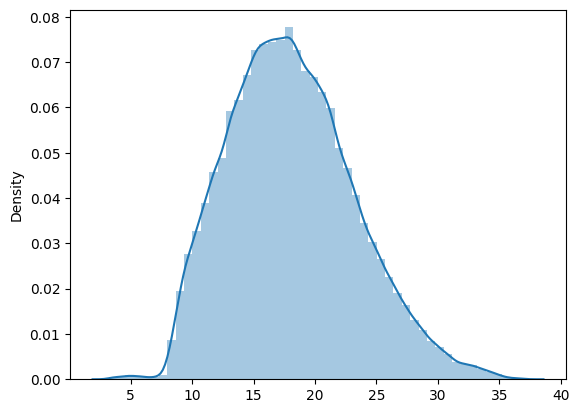

In [20]:
sns.distplot(new_d[['T (degC)']])

Skewness is reduced in the distribution

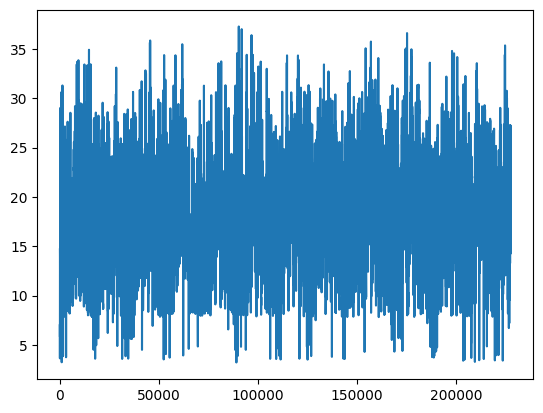

In [21]:
plt.plot(new_d[['T (degC)']])

In [22]:
new_d .set_index('Date Time',drop=True,inplace=True) 


In [23]:
new_d

,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
Date Time,,,,,,,,,,
2010-01-03 16:00:00,5.91,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
2010-01-03 16:10:00,5.83,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2010-01-04 09:00:00,5.93,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
2010-01-04 09:10:00,5.83,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
2010-01-04 11:30:00,7.08,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...,...
2022-12-06 23:10:00,18.46,292.31,8.86,21.28,11.39,9.89,7.17,11.48,1179.47,53.51
2022-12-06 23:20:00,18.50,292.36,8.59,21.33,11.18,10.15,7.04,11.27,1179.34,52.41
2022-12-06 23:30:00,18.63,292.49,8.37,21.51,11.02,10.49,6.94,11.11,1178.82,51.22


In [24]:
target=new_d[['T (degC)']]
new_d.drop(['T (degC)'], axis=1)

,Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
Date Time,,,,,,,,,
2010-01-03 16:00:00,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
2010-01-03 16:10:00,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2010-01-04 09:00:00,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
2010-01-04 09:10:00,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
2010-01-04 11:30:00,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...
2022-12-06 23:10:00,292.31,8.86,21.28,11.39,9.89,7.17,11.48,1179.47,53.51
2022-12-06 23:20:00,292.36,8.59,21.33,11.18,10.15,7.04,11.27,1179.34,52.41
2022-12-06 23:30:00,292.49,8.37,21.51,11.02,10.49,6.94,11.11,1178.82,51.22


Data Transformation using MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
new_d [new_d.columns] = Ms.fit_transform(new_d)

Train-Test split

In [26]:
training_size = round(len(new_d) * 0.80)

In [27]:
train_data = new_d [:training_size]
target_train = target [:training_size]
target_test = target [training_size:]
test_data  = new_d [training_size:]

#### Prediction with XGBoost

In [28]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_data, target_train,)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [29]:
xgbpredictions = pd.DataFrame(reg.predict(test_data))
xgbpredictions=xgbpredictions[[0]]
index=target_test.index.copy()
a=pd.DataFrame(index)
xgbpredictions=pd.concat([a, xgbpredictions], axis=1, ignore_index=True)
xgbpredictions.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
xgbpredictions .set_index('Date Time',drop=True,inplace=True) 


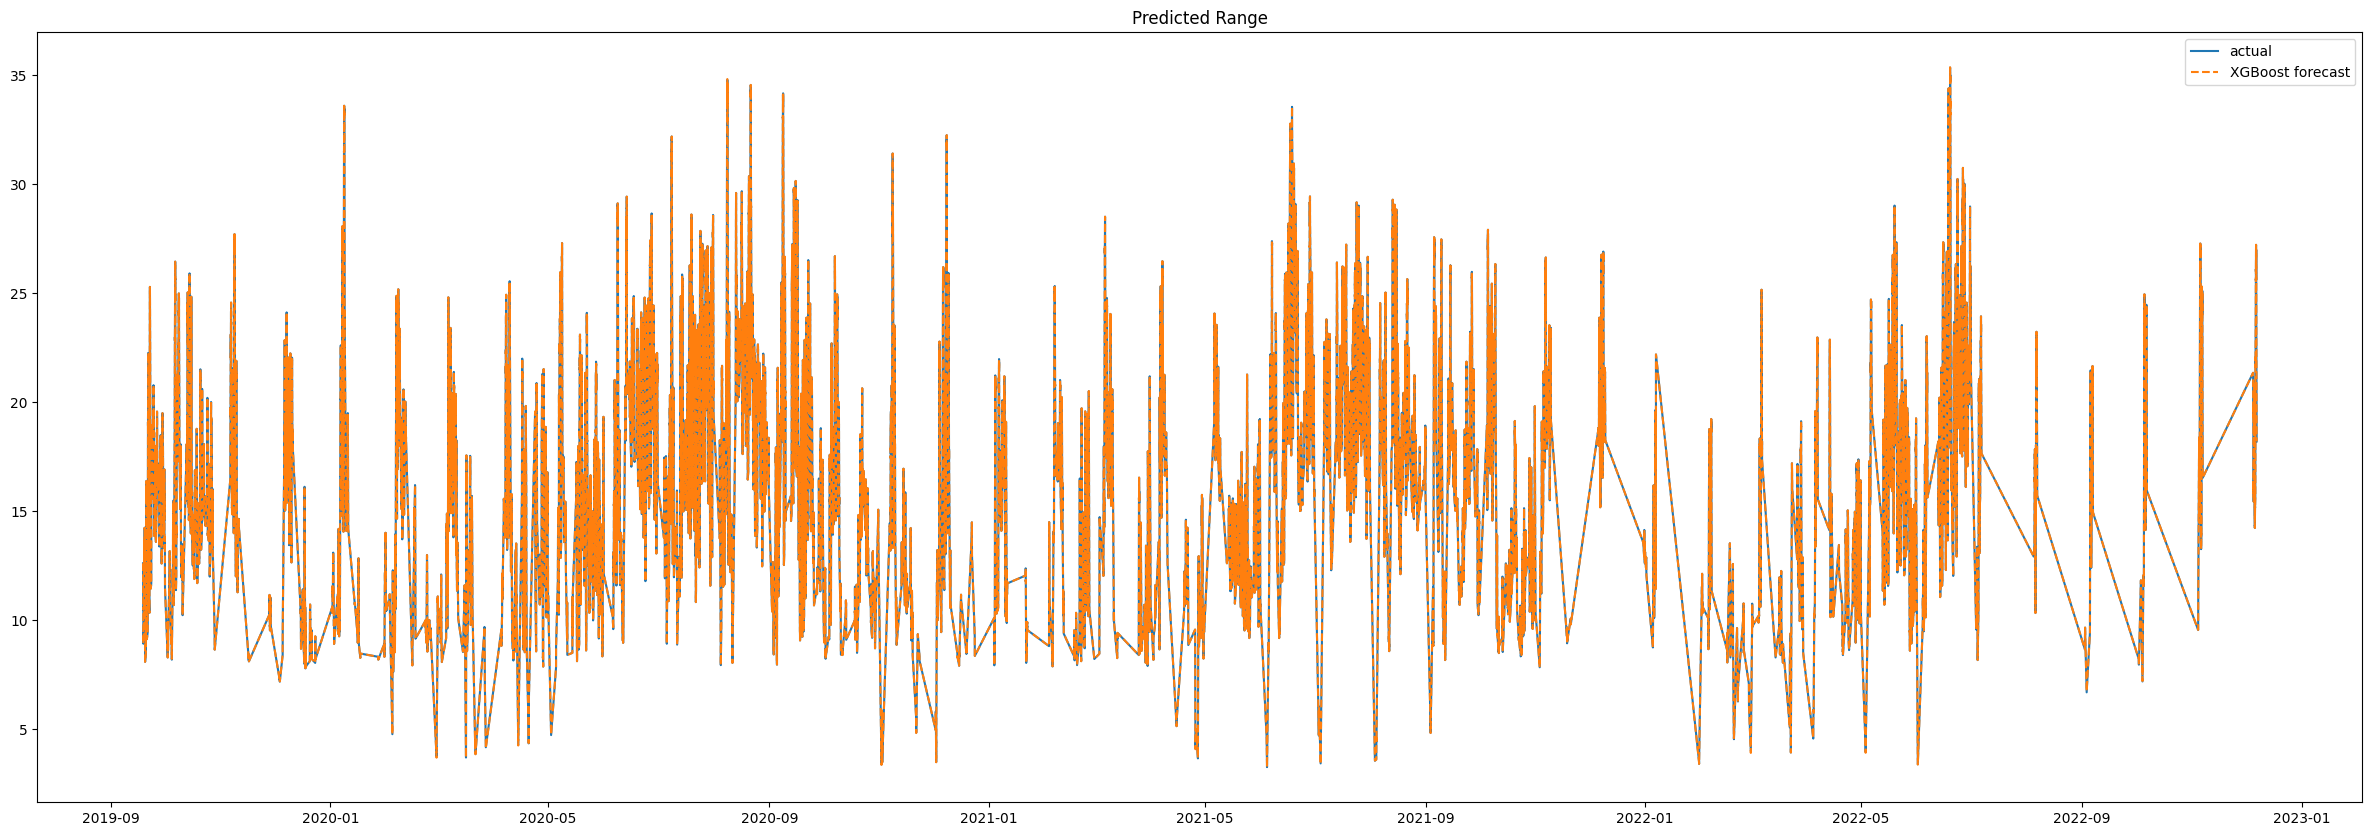

In [30]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(xgbpredictions, linestyle='dashed', label='XGBoost forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

##### Performance Evaluation

In [31]:
rmse_xgboost=mean_squared_error(y_true=target_test,
                   y_pred=xgbpredictions)
rmse_xgboost

6.5283223658774494e-06

In [32]:
mae_xgboost=mean_absolute_error(y_true=target_test,
                   y_pred=xgbpredictions)
mae_xgboost

0.0005856826609835741

##### Random Forest Regressor

In [33]:
model = RandomForestRegressor()
model.fit(train_data, target_train)
# make a one-step prediction
yhat = model.predict(test_data)

C:\Users\haris\AppData\Local\Temp\ipykernel_3532\1288478765.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data, target_train)


In [34]:
yhat = pd.DataFrame(yhat)
index=target_test.index.copy()
a=pd.DataFrame(index)
yhat=pd.concat([a, yhat], axis=1, ignore_index=True)
yhat.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
yhat .set_index('Date Time',drop=True,inplace=True) 


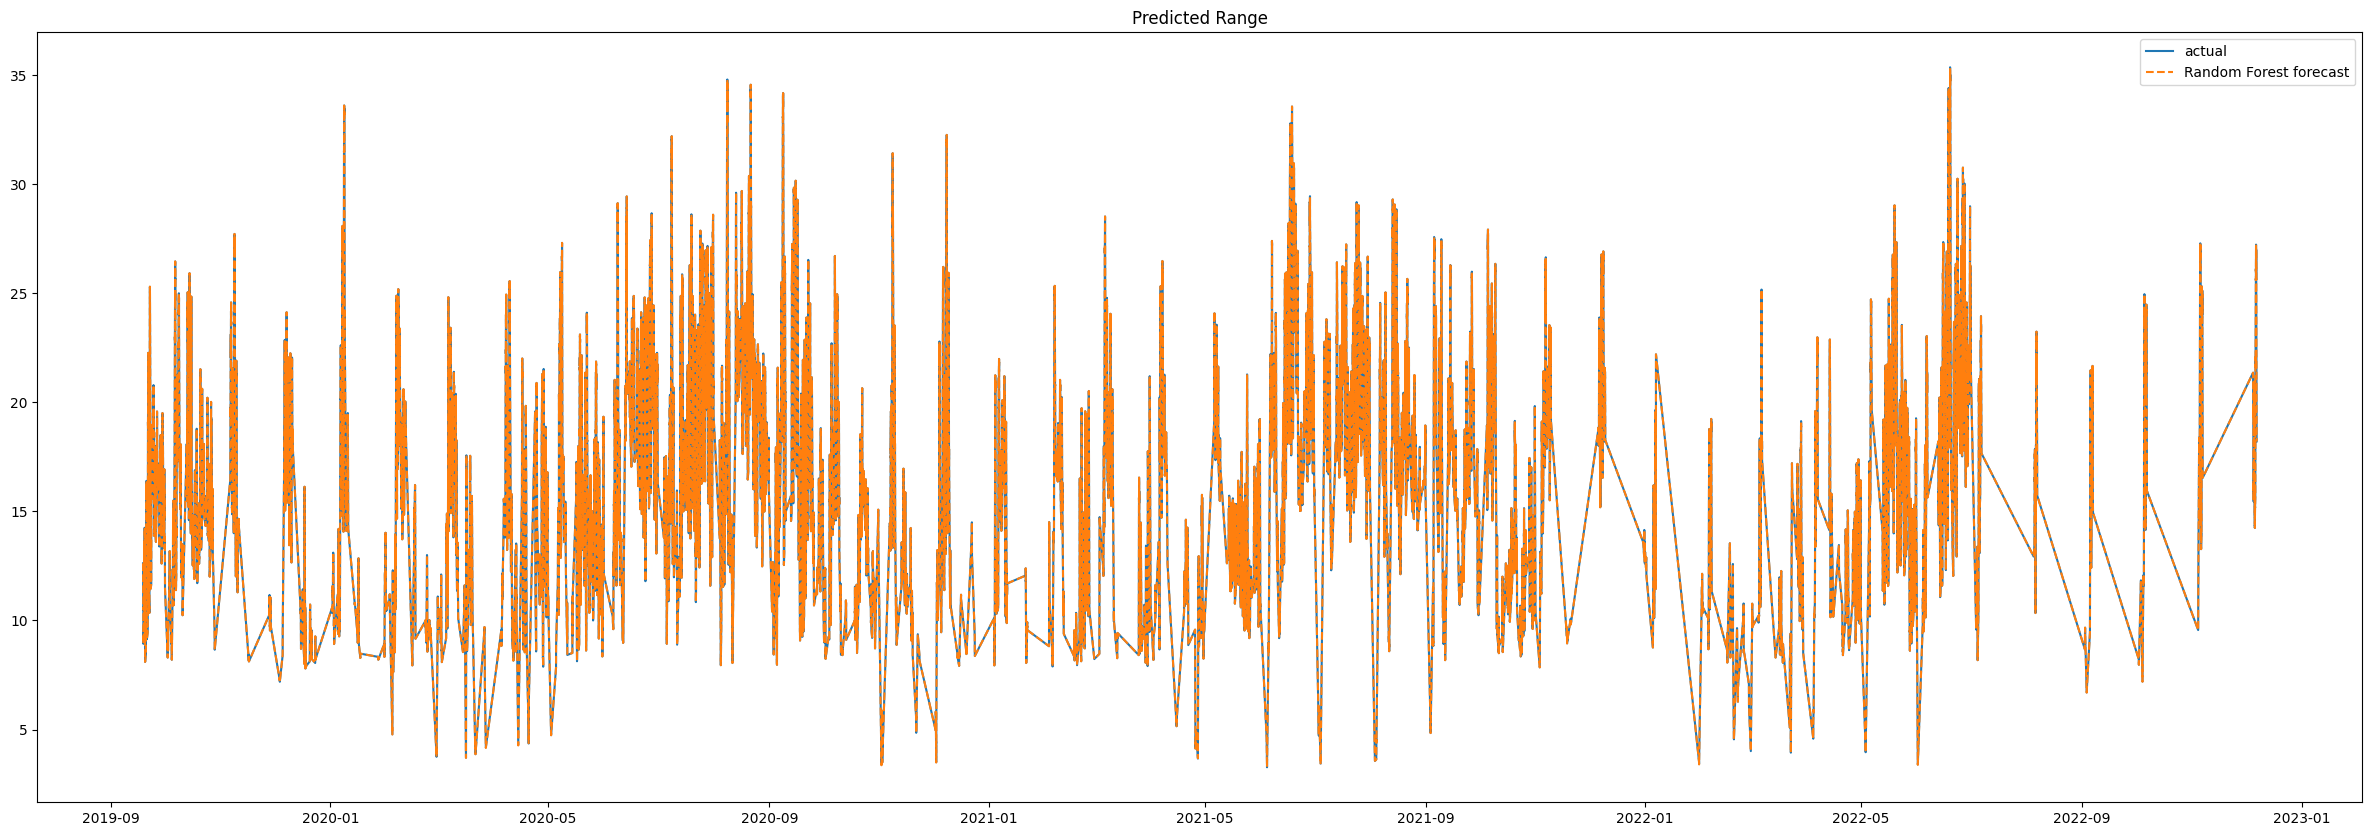

In [35]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(yhat, linestyle='dashed', label='Random Forest forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

##### Performance Evaluation

In [36]:
rmse_rf=mean_squared_error(y_true=target_test,
                   y_pred=yhat)
rmse_rf

5.190685220137989e-07

In [37]:
mae_rf=mean_absolute_error(y_true=target_test,
                   y_pred=yhat)
mae_rf

3.824239500124359e-05

LSTM Model

In [38]:
train_data, test_data = np.array(train_data), np.array(test_data)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [40]:
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape = (train_data.shape[1],1)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=10))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
Total params: 1,342
Trainable params: 1,342
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=model.fit(train_data, target_train, epochs=30,validation_data=(test_data, target_test), verbose=1)

Epoch 1/30
5696/5696 [==============================] - 64s 10ms/step - loss: 37.8352 - mean_absolute_error: 3.8105 - val_loss: 0.5997 - val_mean_absolute_error: 0.3863
Epoch 2/30
5696/5696 [==============================] - 65s 11ms/step - loss: 0.2920 - mean_absolute_error: 0.3194 - val_loss: 0.0574 - val_mean_absolute_error: 0.1992
Epoch 3/30
5696/5696 [==============================] - 84s 15ms/step - loss: 0.0668 - mean_absolute_error: 0.1946 - val_loss: 0.0256 - val_mean_absolute_error: 0.1310
Epoch 4/30
5696/5696 [==============================] - 85s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.1687 - val_loss: 0.0253 - val_mean_absolute_error: 0.1307
Epoch 5/30
5696/5696 [==============================] - 84s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.1541 - val_loss: 0.0151 - val_mean_absolute_error: 0.0936
Epoch 6/30
5696/5696 [==============================] - 81s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.1417 - val_loss: 0.0123 - val_mean_absolute_error

In [42]:
test_predicted = model.predict(test_data)

1424/1424 [==============================] - 6s 3ms/step


In [43]:
predicted=pd.DataFrame(test_predicted)
predicted=predicted[[0]]
index=target_test.index.copy()
a=pd.DataFrame(index)
predicted=pd.concat([a, predicted], axis=1, ignore_index=True)
predicted.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
predicted .set_index('Date Time',drop=True,inplace=True) 

In [44]:
predicted

,T (degC)
Date Time,
2019-09-18 18:20:00,12.590512
2019-09-18 18:30:00,12.571294
2019-09-18 18:40:00,12.503807
2019-09-18 18:50:00,12.417461
2019-09-18 19:00:00,12.196766
...,...
2022-12-06 23:10:00,18.261208
2022-12-06 23:20:00,18.299679
2022-12-06 23:30:00,18.425175


In [45]:
predictions=pd.concat([target_test,predicted], axis=1, ignore_index=True)
predictions.rename(columns = {0:'Actual Temperature (degC)', 1:'Predicted Temperature (degC)' }, inplace = True)

Actual vs Predictions

In [46]:
predictions

,Actual Temperature (degC),Predicted Temperature (degC)
Date Time,,
2019-09-18 18:20:00,12.62,12.590512
2019-09-18 18:30:00,12.60,12.571294
2019-09-18 18:40:00,12.53,12.503807
2019-09-18 18:50:00,12.44,12.417461
2019-09-18 19:00:00,12.21,12.196766
...,...,...
2022-12-06 23:10:00,18.46,18.261208
2022-12-06 23:20:00,18.50,18.299679
2022-12-06 23:30:00,18.63,18.425175


In [47]:
before=target_train
actual=before.append(target_test)
after=target_train
pred=after.append(predicted)

C:\Users\haris\AppData\Local\Temp\ipykernel_3532\3777245379.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual=before.append(target_test)
C:\Users\haris\AppData\Local\Temp\ipykernel_3532\3777245379.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=after.append(predicted)


##### Performance Evaluation

In [48]:
rmse_lstm = mean_squared_error(y_true=target_test,
                   y_pred=predicted)
rmse_lstm

0.02203957742232269

In [49]:
mae_lstm = mean_absolute_error(y_true=target_test,
                   y_pred=predicted)
mae_lstm

0.12421312946593195

LSTM model has least error as compared to RandomForest and XGBoost for Weather Forecasting and hence LSTM model is the better option amongst RandomForest and XGBoost

Weather Forecast vs Actual

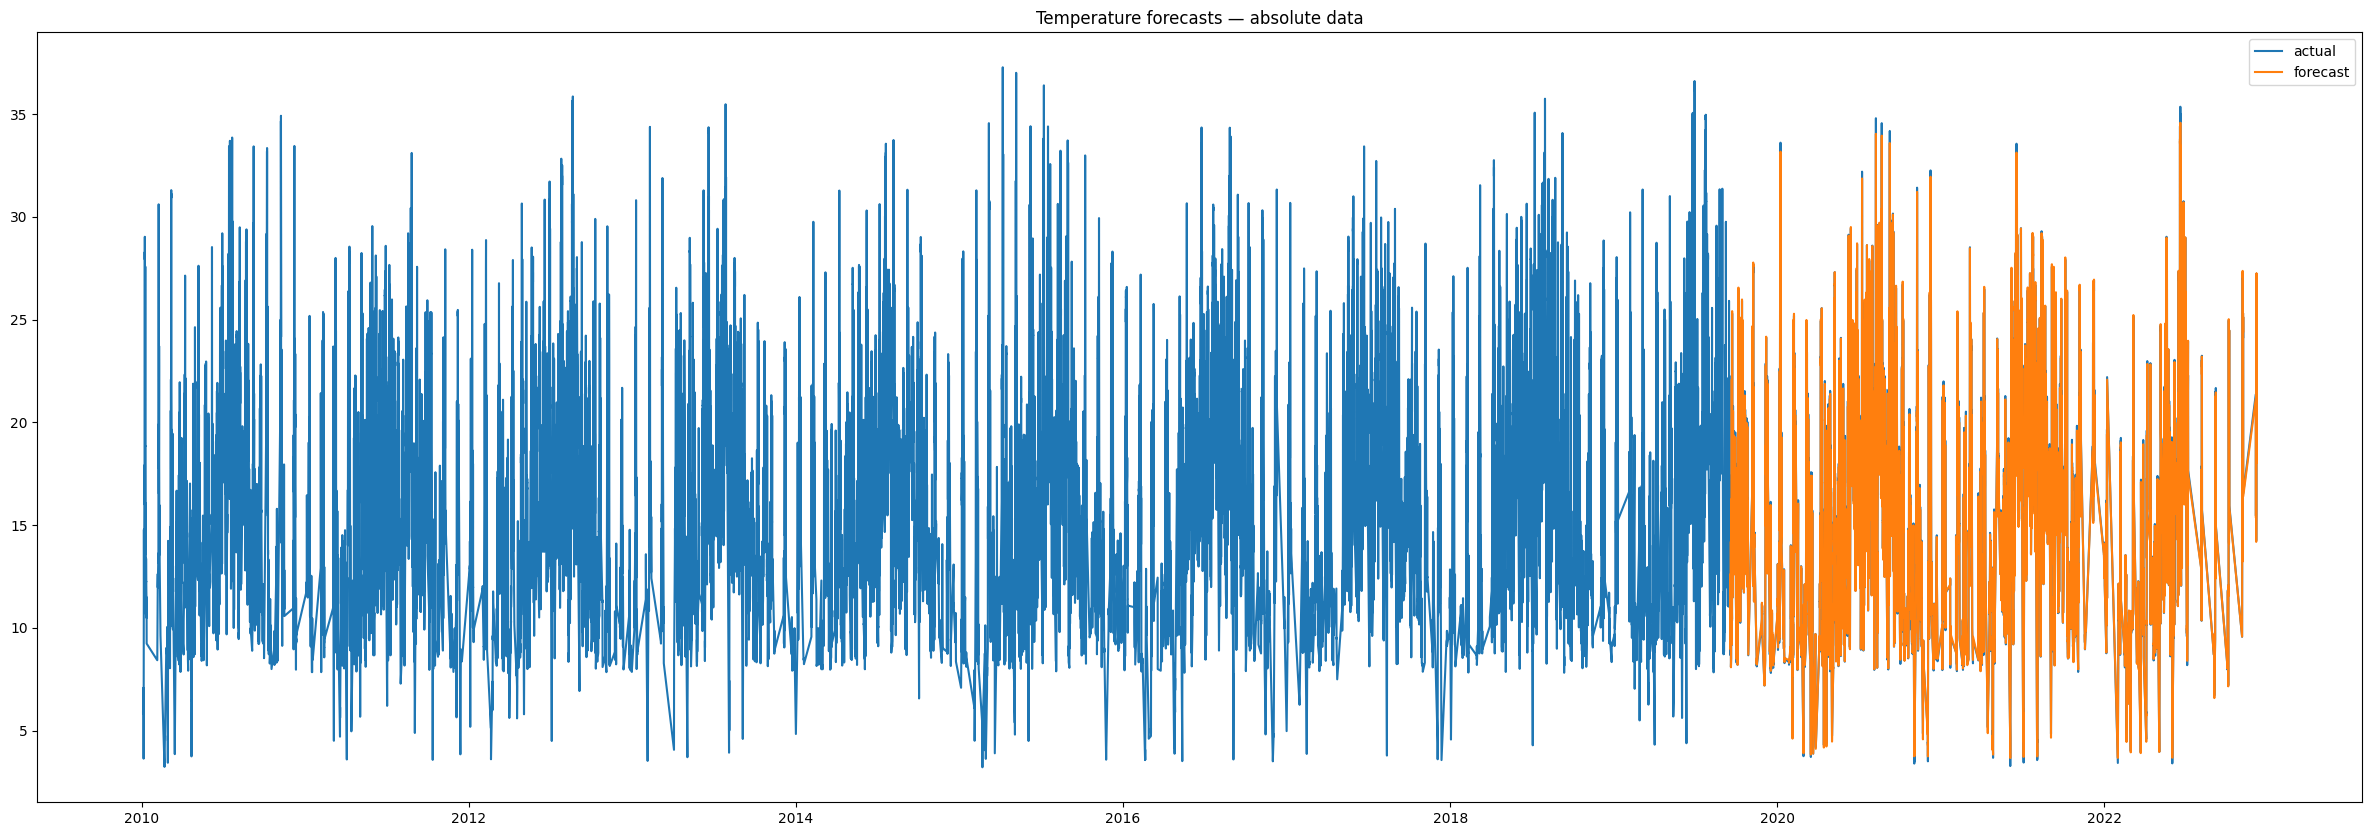

In [50]:
plt.figure(figsize=(30, 10))
plt.plot(actual, label='actual')
plt.plot(predicted, label='forecast')
plt.title('Temperature forecasts — absolute data')
plt.legend()
plt.show()

Inspecting the Predicted Range

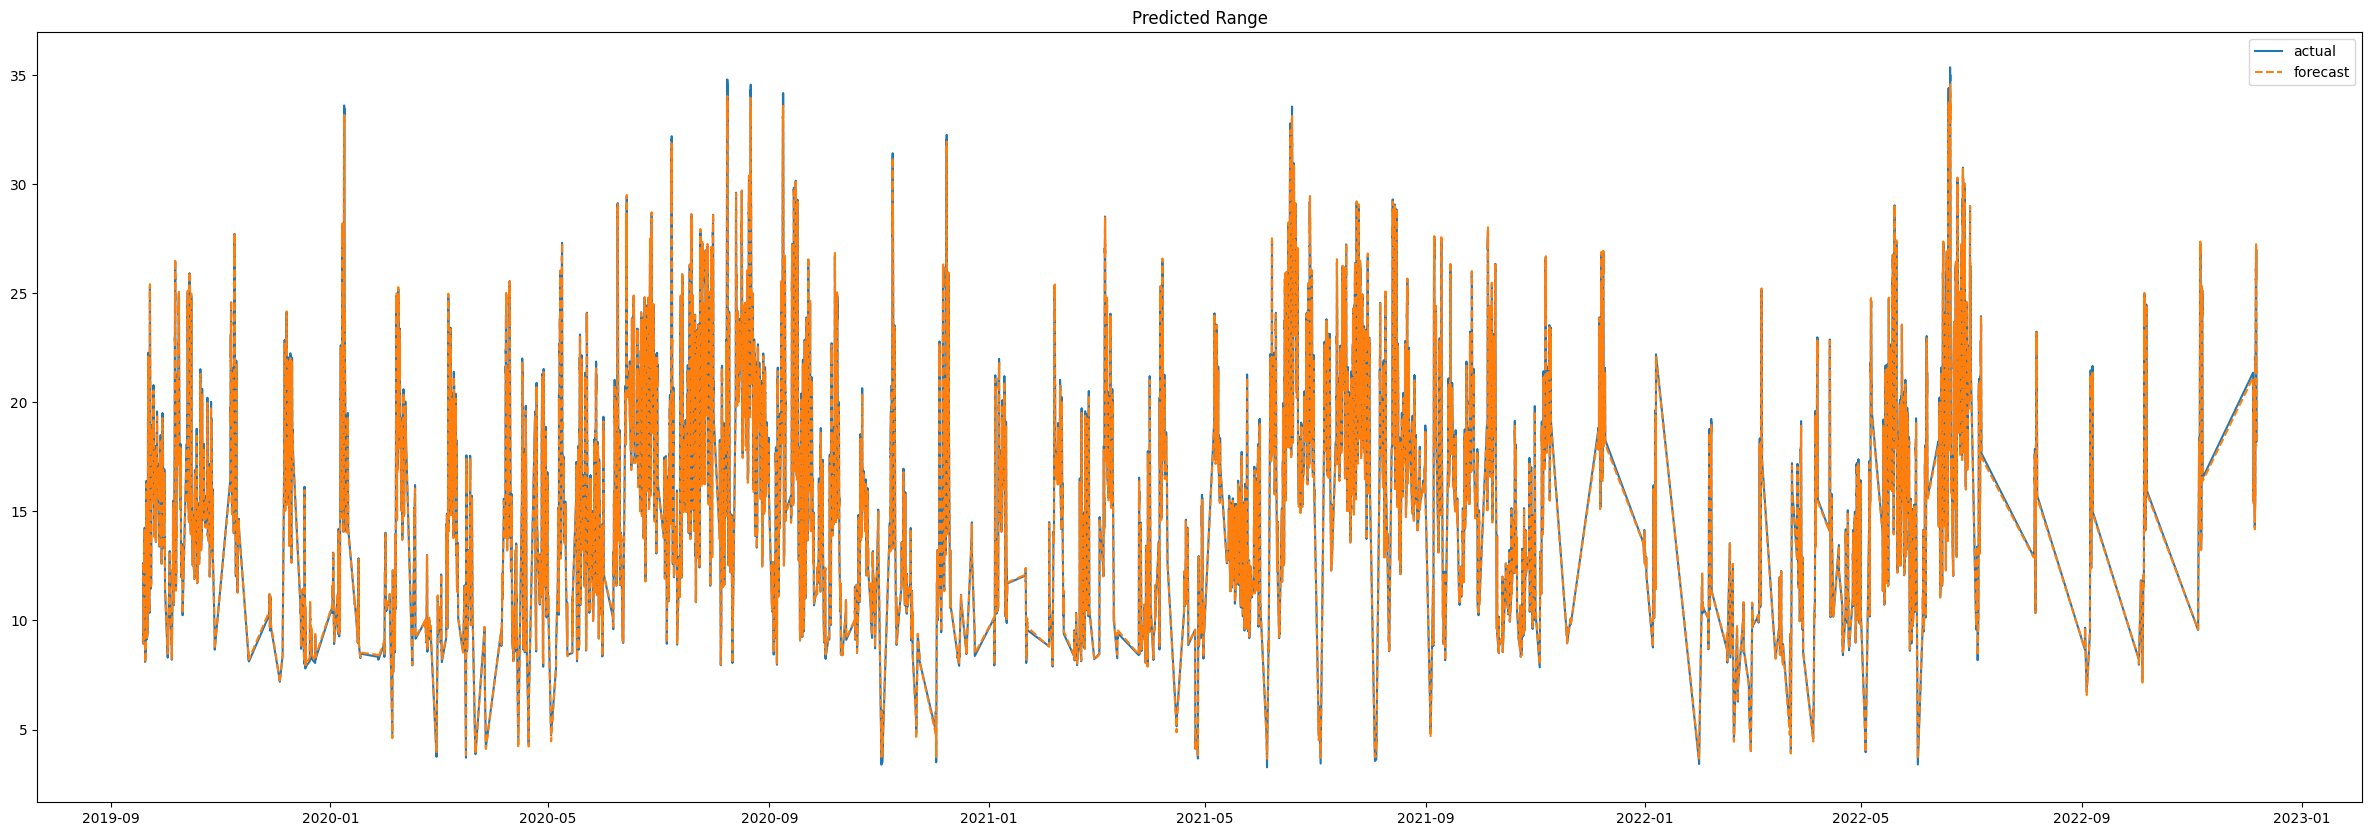

In [51]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(predicted, linestyle='dashed', label='forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

Inspecting some random small chunks

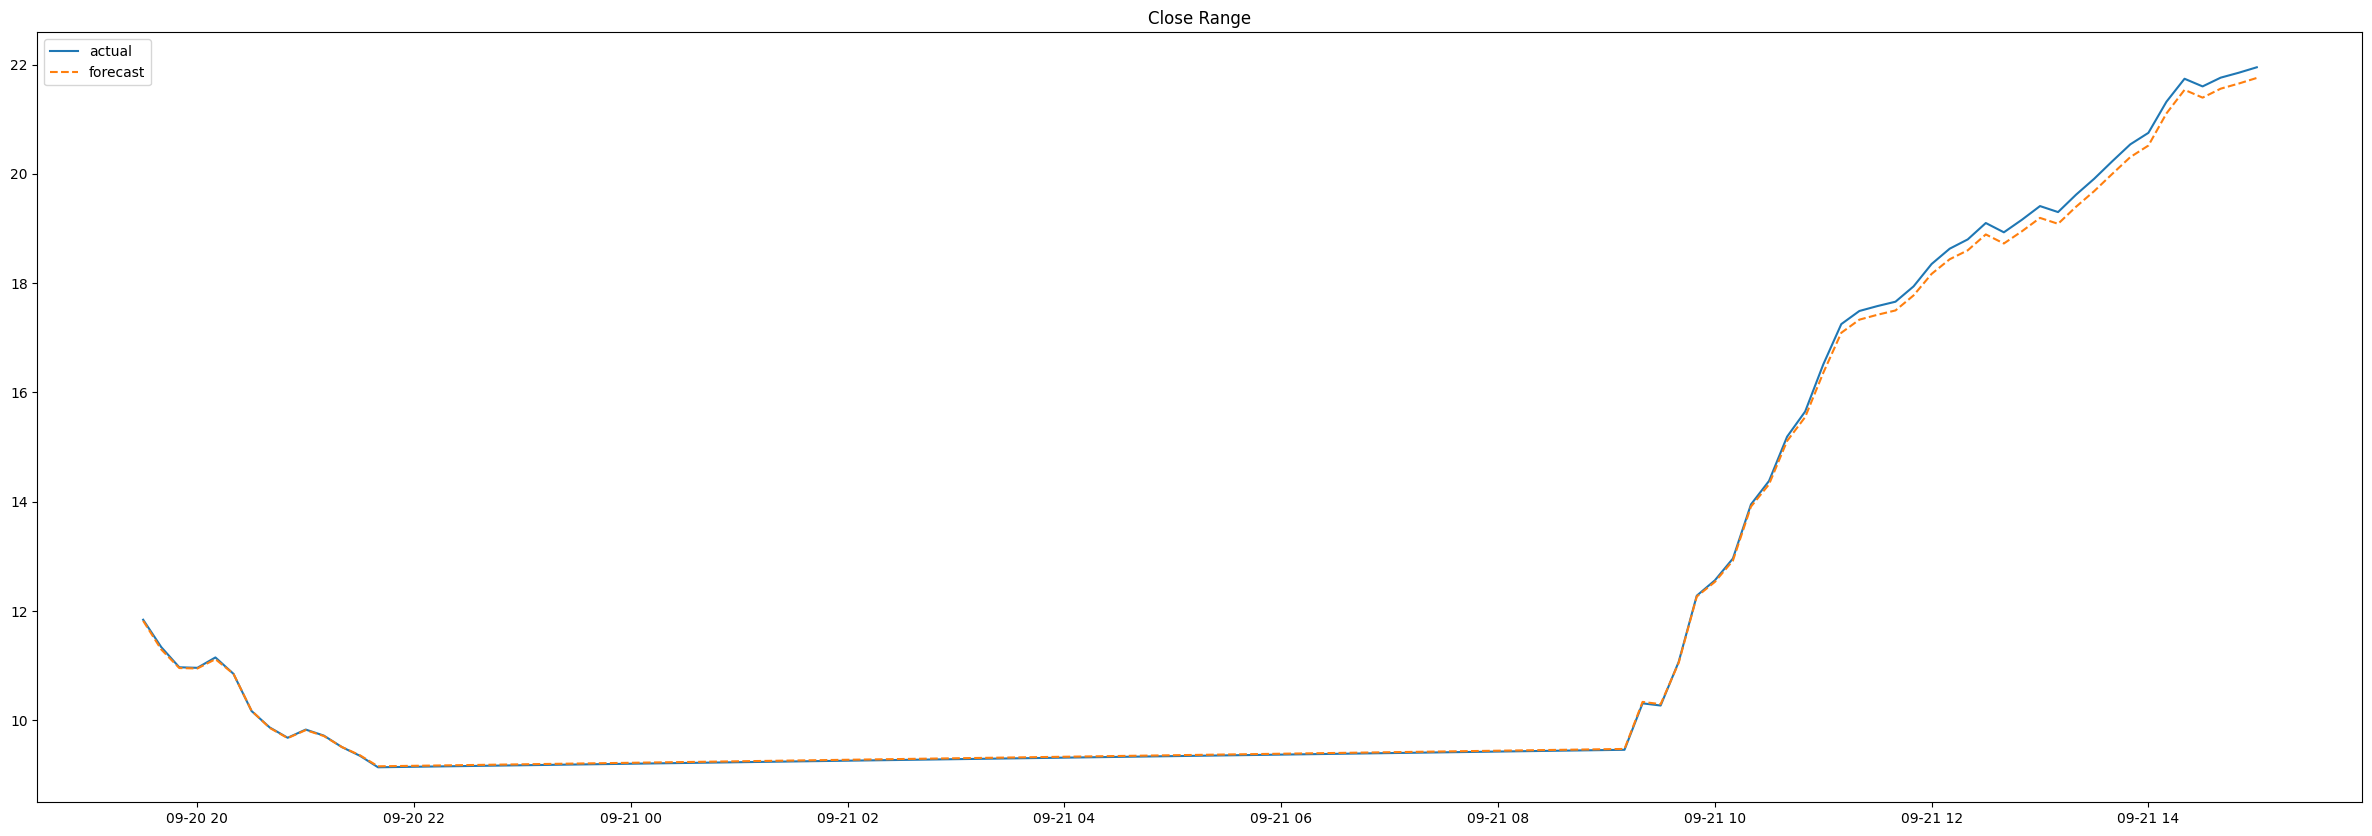

In [52]:
plt.figure(figsize=(30, 10))
plt.plot(target_test[150:200], label='actual')
plt.plot(predicted[150:200], linestyle='dashed', label='forecast')
plt.title('Close Range')
plt.legend()
plt.show()

The two lines are very close to each other, they basically overlap. 

#### Performance Comparison between the models

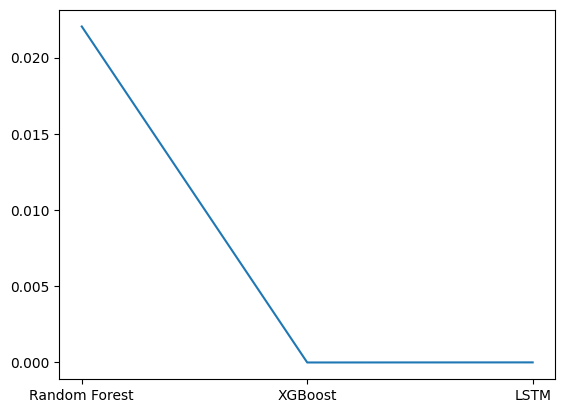

In [72]:
rmse = [rmse_lstm, rmse_rf, rmse_xgboost]
x=np.array(rmse)
plt.plot(['Random Forest', 'XGBoost', 'LSTM'], x)

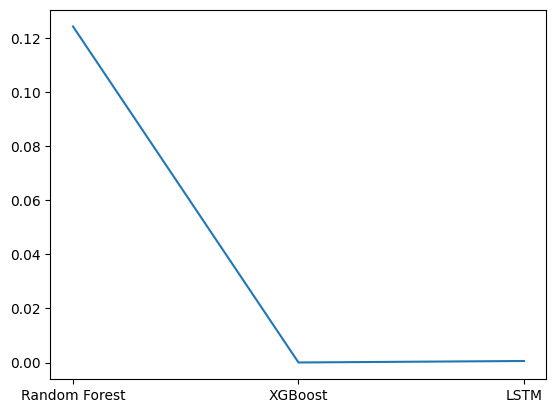

In [73]:
mae = [mae_lstm, mae_rf, mae_xgboost]
x=np.array(mae)
plt.plot(['Random Forest', 'XGBoost', 'LSTM'], x)